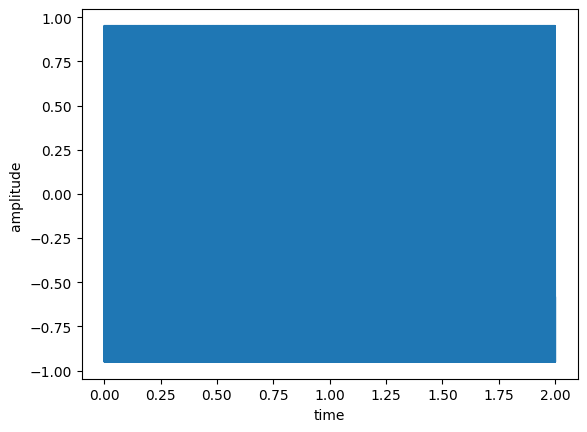

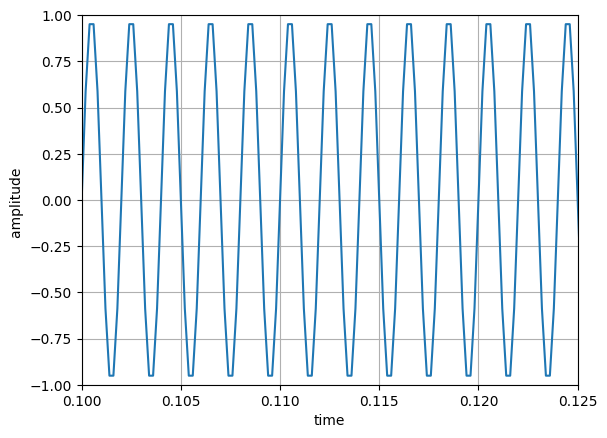

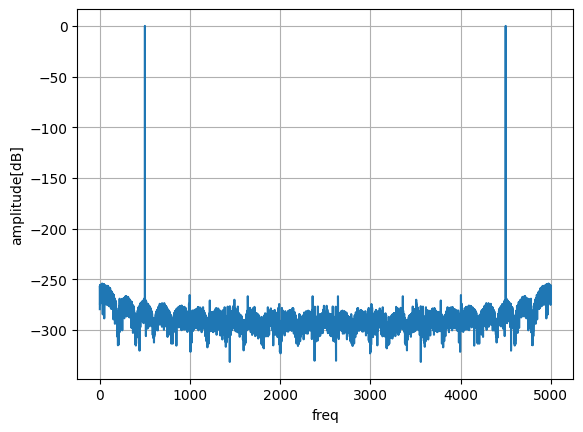

(array([1000, 9000], dtype=int64), {'peak_heights': array([-4.72520459e-14, -4.72520459e-14])})
500.0
4500.0


C:\Users\Omer Ravid\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Omer Ravid\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


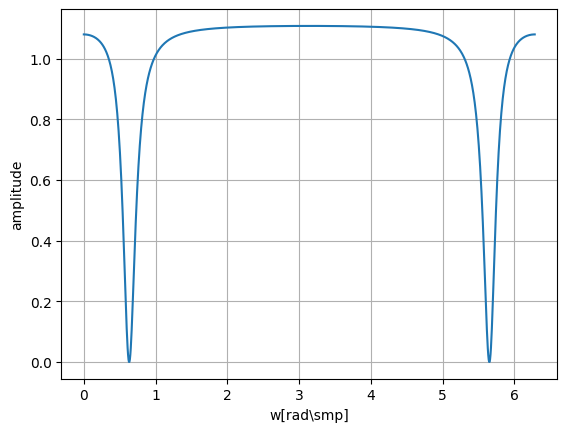

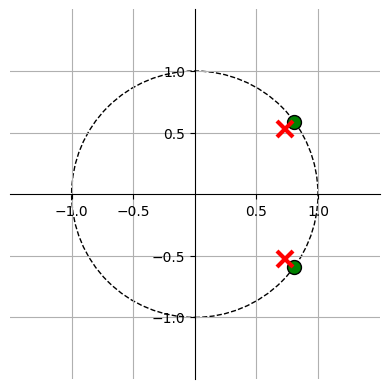

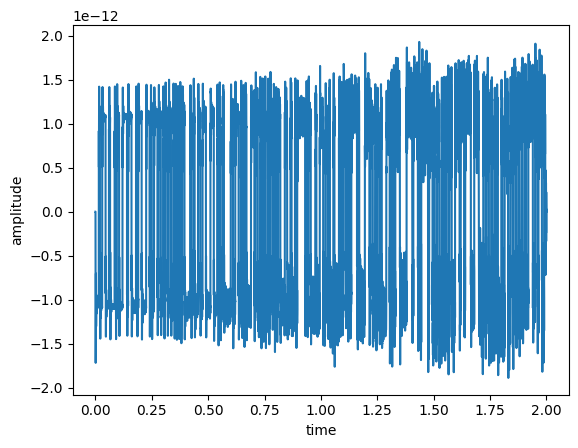

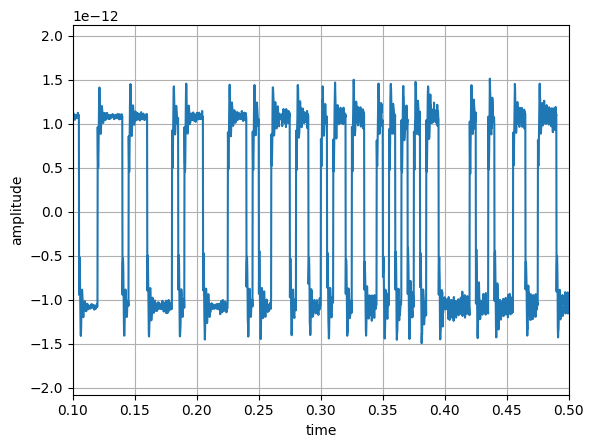

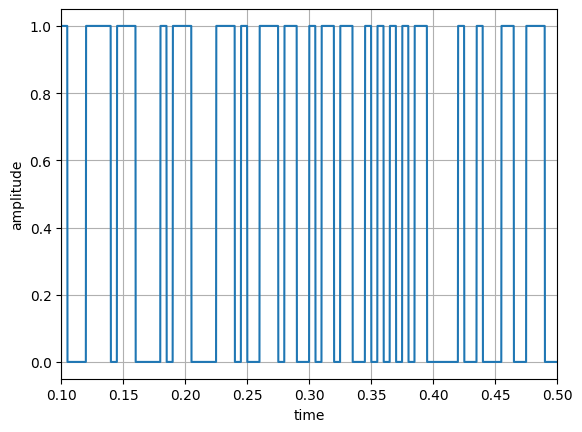

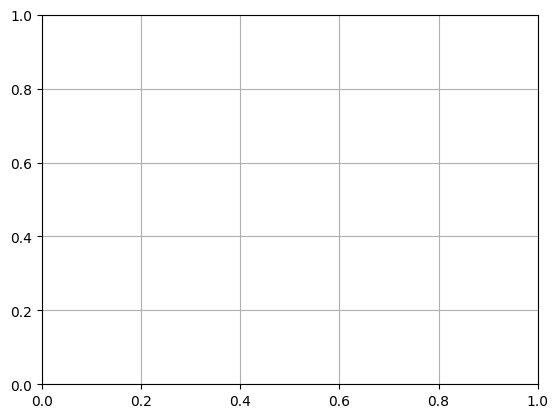

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt
from  matplotlib import patches

from matplotlib.figure import Figure
from matplotlib import rcParams

s = np.load('input_signal.npy')


#### A
Xn=np.arange(0,2,0.0002)
plt.plot(Xn, s)
plt.xlabel('time')
plt.ylabel('amplitude ')
plt.show()
plt.grid()

#### B
plt.plot(Xn, s)
plt.axis([0.1,0.125,-1,1])
plt.xlabel('time')
plt.ylabel('amplitude ')
plt.show()
plt.grid()

#### C
Sfft=fft(s)
D=20*np.log10(abs(Sfft)/5000)
Dn=np.linspace(0,((10000-1)/10000)*5000,10000)
plt.plot(Dn,D)
plt.xlabel('freq')
plt.ylabel('amplitude[dB]')
plt.show()
plt.grid()

##### find peak D
peak = find_peaks(D,-100)
print(peak)
print(Dn[1000])
print(Dn[9000])

###### E + H
fs = 5000
fr1 = 500
fr2 = 4500
w1 = 2*np.pi*(fr1/fs)
w2 = 2*np.pi*(fr2/fs)
w = np.linspace(0 , 2*np.pi , 1000)
z = np.exp(-1j*w)
H = ((z - np.exp(1j*w1))*(z - np.exp(1j*w2)))/((z - 0.9*np.exp(1j*w1))*(z - 0.9*np.exp(1j*w2)))
plt.plot(w,H)
plt.xlabel('w[rad\smp]')
plt.ylabel('amplitude')
plt.show()
plt.grid()

####### G

def zplane(b, a, filename=None):
    """Plot the complex z-plane given a transfer function."""

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b / float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a / float(kd)
    else:
        kd = 1

    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn / float(kd)

    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
             markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
             markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5;
    plt.axis('scaled');
    plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1];
    plt.xticks(ticks);
    plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

    return z, p, k

Poles =[1.0 , -(0.9*np.exp(1j*-w1)+0.9*np.exp(1j*w1)) ,0.81]
ZERO = [1.0, -(np.exp(1j*-w1)+np.exp(1j*w1)) ,1.0]

PZ = zplane(ZERO ,Poles , filename=None)

##### I+J+k
nw = np.linspace(0 ,2 , 10000)
y = np.zeros(10000)

for n in range( 2 ,9998 ):
    y[n]=s[n]-2*np.cos(np.pi/5)*s[n-1]+s[n-2]+1.8*np.cos(np.pi/5)*y[n-1]-0.81*y[n-2]


plt.plot(nw,y)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()
plt.grid()

##### L
nw = np.linspace(0 ,2 , 10000)
y = np.zeros(10000)

for n in range( 2 ,9998 ):
    y[n]=s[n]-2*np.cos(np.pi/5)*s[n-1]+s[n-2]+1.8*np.cos(np.pi/5)*y[n-1]-0.81*y[n-2]


plt.plot(nw,y)
plt.xlim(0.1,0.5)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()
plt.grid()

####### M

def trash(y):
    Ny = np.zeros(10000)
    for n in range (0,10000):
        if y[n]>=0:
            Ny[n]=1
        elif y[n]<0:
            Ny[n] = 0
    return Ny

ny = trash(y)
plt.plot(nw,ny)
plt.xlim(0.1,0.5)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()
plt.grid()
